https://geographicdata.science/book/notebooks/05_choropleth.html

In [4]:
import seaborn
import pandas
import geopandas
import pysal
import numpy
import matplotlib.pyplot as plt

In [7]:
mx = geopandas.read_file("mexico/mexicojoin.shp")
mx[['NAME', 'PCGDP1940']].head()

,NAME,PCGDP1940
0,Baja California Norte,22361.0
1,Baja California Sur,9573.0
2,Nayarit,4836.0
3,Jalisco,5309.0
4,Aguascalientes,10384.0


In [37]:
mx[['NAME', 'PCGDP1940']]

,NAME,PCGDP1940
0,Baja California Norte,22361.0
1,Baja California Sur,9573.0
2,Nayarit,4836.0
3,Jalisco,5309.0
4,Aguascalientes,10384.0
5,Guanajuato,4359.0
6,Queretaro de Arteaga,11016.0
7,Hidalgo,4414.0
8,Michoacan de Ocampo,3327.0
9,Mexico,3408.0


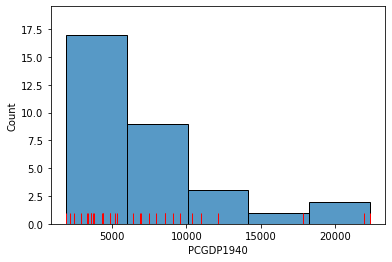

In [8]:
# Plot histogram
ax = seaborn.histplot(mx['PCGDP1940'], bins=5)
# Add rug on horizontal axis
seaborn.rugplot(
    mx['PCGDP1940'], height=0.05, color='red', ax=ax
);

In [9]:
mx['PCGDP1940'].describe()

count       32.000000
mean      7230.531250
std       5204.952883
min       1892.000000
25%       3701.750000
50%       5256.000000
75%       8701.750000
max      22361.000000
Name: PCGDP1940, dtype: float64

In [10]:
counts, bins, patches = ax.hist(mx['PCGDP1940'], bins=5)

In [15]:
bins

array([ 1892. ,  5985.8, 10079.6, 14173.4, 18267.2, 22361. ])

In [14]:
import mapclassify

In [16]:
ei5 = mapclassify.EqualInterval(mx['PCGDP1940'], k=5)
ei5

EqualInterval               

      Interval         Count
----------------------------
[ 1892.00,  5985.80] |    17
( 5985.80, 10079.60] |     9
(10079.60, 14173.40] |     3
(14173.40, 18267.20] |     1
(18267.20, 22361.00] |     2

In [17]:
q5 = mapclassify.Quantiles(mx.PCGDP1940, k=5)
q5

Quantiles                   

      Interval         Count
----------------------------
[ 1892.00,  3576.20] |     7
( 3576.20,  4582.80] |     6
( 4582.80,  6925.20] |     6
( 6925.20,  9473.00] |     6
( 9473.00, 22361.00] |     7

In [18]:
q5.bins[1:] - q5.bins[:-1]

array([ 1006.6,  2342.4,  2547.8, 12888. ])

In [19]:
# Set seed for reproducibility
numpy.random.seed(12345)
# Generate a variable of 20 values randomly
# selected from 0 to 10
x = numpy.random.randint(0,10,20)
# Manually ensure the first ten values are 0 (the
# minimum value)
x[0:10] = x.min()
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 6, 0, 2, 9, 1, 2, 6, 7])

In [20]:
ties = mapclassify.Quantiles(x, k=5)
ties

C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\ProgramData\Anaconda3\envs\Geo\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Quantiles           

  Interval     Count
--------------------
[0.00, 0.00] |    11
(0.00, 1.40] |     1
(1.40, 6.20] |     4
(6.20, 9.00] |     4

In [21]:
ux = numpy.unique(x)
ux

array([0, 1, 2, 6, 7, 9])

In [22]:
msd = mapclassify.StdMean(mx['PCGDP1940'])
msd

StdMean                     

      Interval         Count
----------------------------
(    -inf, -3179.37] |     0
(-3179.37,  2025.58] |     1
( 2025.58, 12435.48] |    28
(12435.48, 17640.44] |     0
(17640.44, 22361.00] |     3

In [23]:
mb5 = mapclassify.MaximumBreaks(mx['PCGDP1940'], k=5)
mb5

MaximumBreaks               

      Interval         Count
----------------------------
[ 1892.00,  5854.00] |    17
( 5854.00, 11574.00] |    11
(11574.00, 14974.00] |     1
(14974.00, 19890.50] |     1
(19890.50, 22361.00] |     2

In [24]:
bp = mapclassify.BoxPlot(mx['PCGDP1940'])
bp

BoxPlot                     

      Interval         Count
----------------------------
(    -inf, -3798.25] |     0
(-3798.25,  3701.75] |     8
( 3701.75,  5256.00] |     8
( 5256.00,  8701.75] |     8
( 8701.75, 16201.75] |     5
(16201.75, 22361.00] |     3

In [25]:
bp1 = mapclassify.BoxPlot(mx['PCGDP1940'], hinge=1)
bp1

BoxPlot                     

      Interval         Count
----------------------------
(    -inf, -1298.25] |     0
(-1298.25,  3701.75] |     8
( 3701.75,  5256.00] |     8
( 5256.00,  8701.75] |     8
( 8701.75, 13701.75] |     5
(13701.75, 22361.00] |     3

In [26]:
ht = mapclassify.HeadTailBreaks(mx['PCGDP1940'])
ht

HeadTailBreaks              

      Interval         Count
----------------------------
[ 1892.00,  7230.53] |    20
( 7230.53, 12244.42] |     9
(12244.42, 20714.00] |     1
(20714.00, 22163.00] |     1
(22163.00, 22361.00] |     1

In [27]:
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(mx['PCGDP1940'], k=5)
jc5

JenksCaspall                

      Interval         Count
----------------------------
[ 1892.00,  2934.00] |     4
( 2934.00,  4414.00] |     9
( 4414.00,  6399.00] |     5
( 6399.00, 12132.00] |    11
(12132.00, 22361.00] |     3

In [28]:
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(mx['PCGDP1940'], k=5)
fj5

FisherJenks                 

      Interval         Count
----------------------------
[ 1892.00,  5309.00] |    17
( 5309.00,  9073.00] |     8
( 9073.00, 12132.00] |     4
(12132.00, 17816.00] |     1
(17816.00, 22361.00] |     2

In [29]:
mp5 = mapclassify.MaxP(mx['PCGDP1940'], k=5)
mp5

MaxP                        

      Interval         Count
----------------------------
[ 1892.00,  3569.00] |     7
( 3569.00,  5309.00] |    10
( 5309.00,  7990.00] |     5
( 7990.00, 10384.00] |     5
(10384.00, 22361.00] |     5

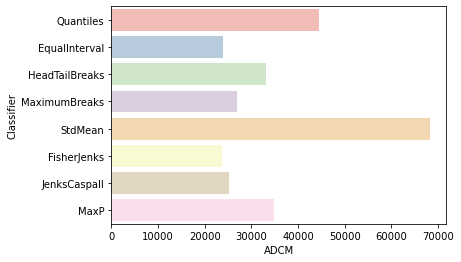

In [30]:
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = numpy.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = seaborn.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

In [31]:
# Append class values as a separate column
mx['Quantiles'] = q5.yb
mx['Equal Interval'] = ei5.yb
mx['Head-Tail Breaks'] = ht.yb
mx['Maximum Breaks'] = mb5.yb
mx['Mean-Standard Deviation'] = msd.yb
mx['Fisher-Jenks'] = fj5.yb
mx['Jenks Caspall'] = jc5.yb
mx['MaxP'] = mp5.yb

In [32]:
mx

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,TEST,geometry,Quantiles,Equal Interval,Head-Tail Breaks,Maximum Breaks,Mean-Standard Deviation,Fisher-Jenks,Jenks Caspall,MaxP
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7.252751e+06,22361.0,20977.0,17865.0,...,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405...",4,4,4,4,4,4,4,4
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7.225988e+06,9573.0,16013.0,16707.0,...,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302...",4,1,1,1,2,2,3,3
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2.731957e+06,4836.0,7515.0,7621.0,...,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475...",2,0,0,0,2,0,2,1
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7.961008e+06,5309.0,8232.0,9953.0,...,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7...",2,0,0,0,2,0,2,1
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,5.467030e+05,10384.0,6234.0,8714.0,...,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8...",4,2,1,1,2,2,3,3
5,6,3.034491e+10,MX11,Guanajuato,918758.241,7.498360e+06,3.034491e+06,4359.0,5686.0,8209.0,...,6.0,"POLYGON ((-100.28030 20.20451, -100.34860 20.0...",1,0,0,0,2,0,1,1
6,7,1.203240e+10,MX22,Queretaro de Arteaga,619581.709,2.973259e+06,1.203240e+06,11016.0,5560.0,7110.0,...,7.0,"POLYGON ((-100.12280 19.93804, -100.18250 20.0...",4,2,1,1,2,2,3,4
7,8,2.123533e+10,MX13,Hidalgo,953861.244,5.247343e+06,2.123533e+06,4414.0,5194.0,6399.0,...,8.0,"POLYGON ((-98.65941 19.58540, -98.65556 19.595...",1,0,0,0,2,0,1,1
8,9,5.947352e+10,MX16,Michoacan de Ocampo,1431015.877,1.469617e+07,5.947352e+06,3327.0,5272.0,5244.0,...,9.0,"POLYGON ((-103.47960 18.96722, -103.34830 18.9...",0,0,0,0,2,0,1,0
9,10,2.147628e+10,MX15,Mexico,888381.807,5.306884e+06,2.147628e+06,3408.0,4972.0,9053.0,...,10.0,"POLYGON ((-98.62798 19.47576, -98.66612 19.405...",0,0,0,0,2,0,1,0


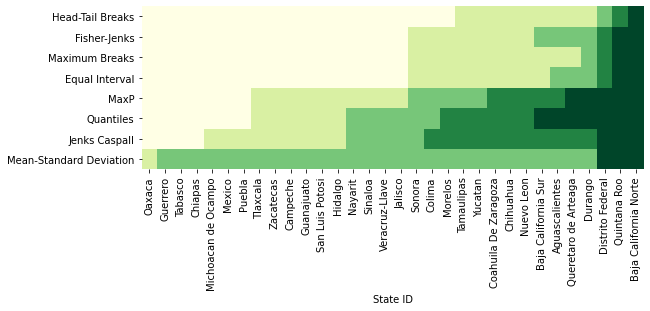

In [36]:
f, ax = plt.subplots(1, figsize=(9,3))
seaborn.heatmap(
    mx.set_index('NAME').sort_values(
        'PCGDP1940'
    )[
        [
            'Head-Tail Breaks', 
            'Fisher-Jenks',
            'Maximum Breaks', 
            'Equal Interval',
            'MaxP',
            'Quantiles', 
            'Jenks Caspall',
            'Mean-Standard Deviation',
        ]
    ].T,
    cmap='YlGn',
    cbar=False,
    ax=ax
)
ax.set_xlabel('State ID');

In [38]:
pandas.DataFrame(
    {c.name: c.counts for c in class5},
    index=['Class-{}'.format(i) for i in range(5)]
)

,Quantiles,EqualInterval,HeadTailBreaks,MaximumBreaks,StdMean,FisherJenks,JenksCaspall,MaxP
Class-0,7,17,20,17,0,17,4,7
Class-1,6,9,9,11,1,8,9,10
Class-2,6,3,1,1,28,4,5,5
Class-3,6,1,1,1,0,1,11,5
Class-4,7,2,1,2,3,2,3,5


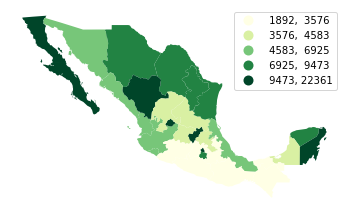

In [39]:
ax = mx.plot(
    column='PCGDP1940',          # Data to plot
    scheme='Quantiles',          # Classification scheme
    cmap='YlGn',                 # Color palette
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend
)
ax.set_axis_off();

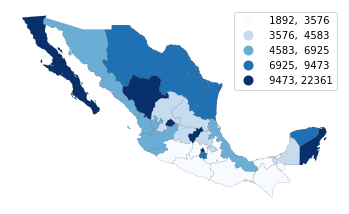

In [40]:
ax = mx.plot(
    column='PCGDP1940',          # Data to plot
    scheme='Quantiles',          # Classification scheme
    cmap='Blues',                # Color palette
    edgecolor='k',               # Borderline color
    linewidth=0.1,               # Borderline width
    legend=True,                 # Add legend
    legend_kwds={'fmt':'{:.0f}'} # Remove decimals in legend (for legibility)
)
ax.set_axis_off();

In [41]:
mx[
    ['NAME', 'PCGDP1940', 'PCGDP2000']
].rank(ascending=False)

,NAME,PCGDP1940,PCGDP2000
0,31.0,1.0,6.0
1,30.0,7.0,10.0
2,15.0,19.0,29.0
3,19.0,16.0,13.0
4,32.0,6.0,8.0
5,22.0,22.0,21.0
6,11.0,5.0,9.0
7,20.0,20.0,24.0
8,17.0,28.0,26.0
9,18.0,27.0,18.0


In [42]:
# Create income-based rank table (Rank 1 is highest)
rnk = mx[
    ['NAME', 'PCGDP1940', 'PCGDP2000']
].rank(ascending=False)
# Compute change from 1940 to 2000
rnk['change'] = rnk['PCGDP1940'] - rnk['PCGDP2000']
# Add column with bin class
rnk['class'] = pandas.cut(rnk['change'], [-numpy.inf, -5, 0, 5, 20])

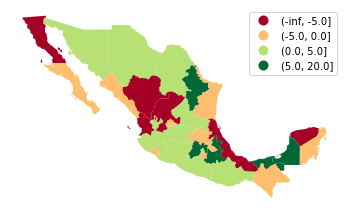

In [43]:
ax = mx[['geometry']].join(rnk).plot(
    'class', legend=True, cmap='RdYlGn'
)
ax.set_axis_off();

In [44]:
mx['HANSON98'].head()

0    1.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: HANSON98, dtype: float64

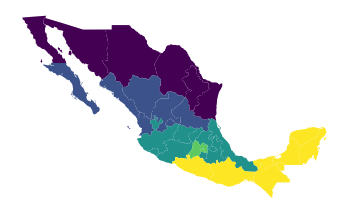

In [45]:
ax = mx.plot('HANSON98')
ax.set_axis_off();

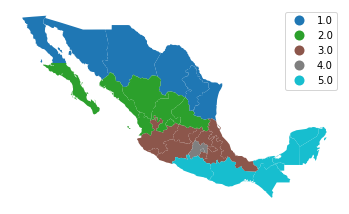

In [46]:
ax = mx.plot('HANSON98', categorical=True, legend=True)
ax.set_axis_off();

In [47]:
classi = mapclassify.UserDefined(
    mx['PCGDP2000'], [10000, 12500, 15000]
)
classi

UserDefined                 

      Interval         Count
----------------------------
[ 8684.00, 10000.00] |     2
(10000.00, 12500.00] |     7
(12500.00, 15000.00] |     1
(15000.00, 54349.00] |    22

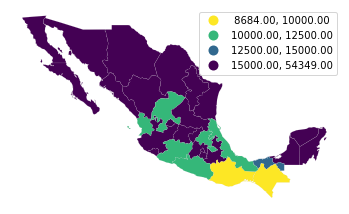

In [48]:
classi.plot(
    mx,                      # Use geometries in the geo-table
    legend=True,             # Add a legend
    legend_kwds={
        'loc': 'upper right' # Place legend on top right corner
    },
    axis_on=False,           # Remove axis
    cmap='viridis_r'         # Use reverse Viridis
);

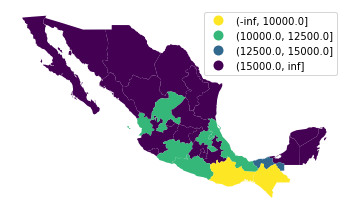

In [50]:
# Classify values specifying bins
lbls = pandas.cut(
    mx['PCGDP2000'], [-numpy.inf, 10000, 12500, 15000, numpy.inf]
)
# Dynamically assign to geo-table and plot with a legend
ax = mx.plot(lbls, cmap='viridis_r', legend=True
)
# Remove axis
ax.set_axis_off();

In [51]:
# List the years we want of pc GDP
years = ['PCGDP1940', 'PCGDP1960', 'PCGDP1980', 'PCGDP2000']
# Create pooled classification
pooled = mapclassify.Pooled(
    mx[years], classifier='Quantiles', k=5
)

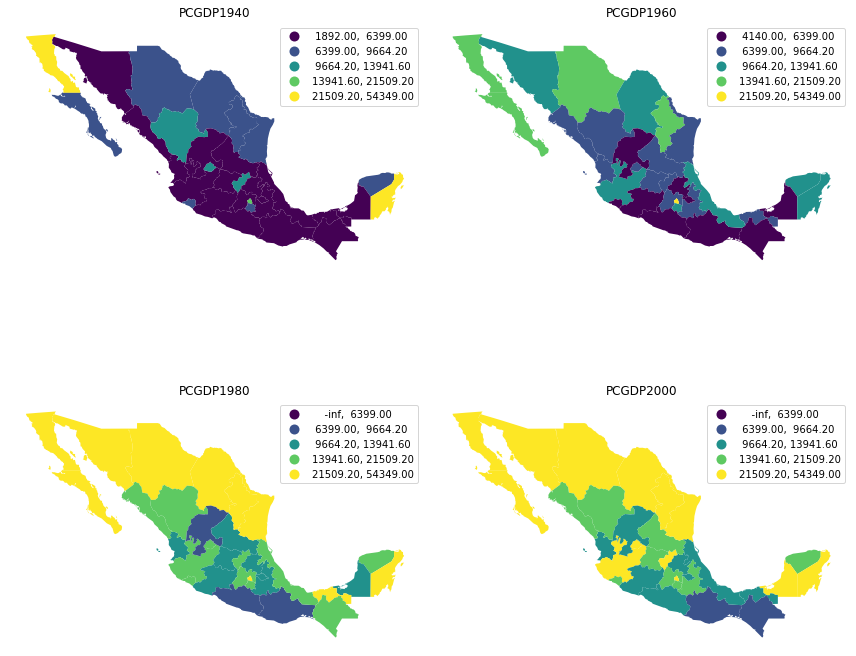

In [52]:
# Set up figure with four axis
f, axs = plt.subplots(2, 2, figsize=(12, 12))
# Flatten the array of axis so you can loop over
# in one dimension
axs = axs.flatten()
# Loop over each year
for i, y in enumerate(years):
    mx.plot(
        y,                    # Year to plot
        scheme='UserDefined', # Use our own bins
        classification_kwds={ # Use global bins
            'bins': pooled.global_classifier.bins
        }, 
        legend=True,          # Add a legend
        ax=axs[i]             # Plot on the corresponding axis
    )
    # Remove axis
    axs[i].set_axis_off()
    # Name the subplot with the name of the column
    axs[i].set_title(y)
# Tight layout to better use space
plt.tight_layout()
# Display figure
plt.show()